In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('DailyDelhiClimate.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [7]:
df = df[['date', 'meantemp']]
df.head()

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


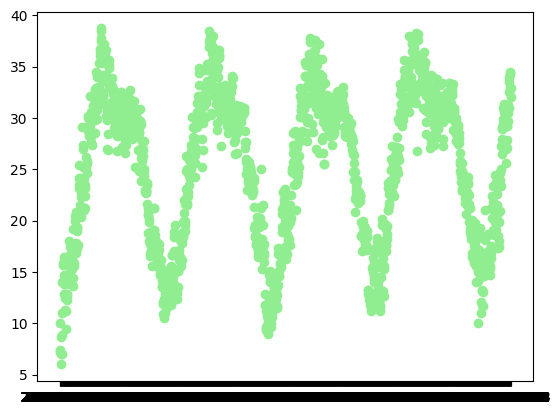

In [9]:
plt.scatter(df['date'], df['meantemp'], color='lightgreen')

In [10]:
x1 = df['meantemp'].ewm(alpha=0.9).mean()

In [11]:
x1

0       10.000000
1        7.636364
2        7.213213
3        8.521452
4        6.252123
          ...    
1571    34.403401
1572    34.265340
1573    33.036534
1574    32.891153
1575    32.089115
Name: meantemp, Length: 1576, dtype: float64

In [12]:
df['ewma'] = x1
df.head()

,date,meantemp,ewma
0,2013-01-01,10.000000,10.000000
1,2013-01-02,7.400000,7.636364
2,2013-01-03,7.166667,7.213213
3,2013-01-04,8.666667,8.521452
4,2013-01-05,6.000000,6.252123


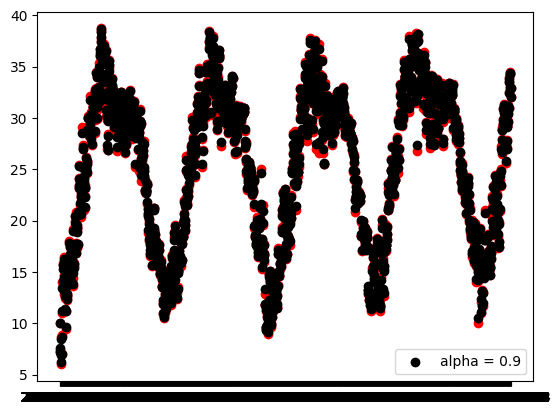

In [14]:
plt.scatter(df['date'], df['meantemp'], color='red')
plt.scatter(df['date'], x1, color='black', label='alpha = 0.9')
plt.legend()
plt.show()